In [2]:
# Importing all neccessary Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity

In [3]:
# Load Datasets
movies = pd.read_csv(r"D:\Project\movies.csv",encoding='ISO-8859-1')
ratings = pd.read_csv(r"D:\Project\ratings.csv",encoding='ISO-8859-1')

In [4]:
# First Look at the Data
print("🎬 Movies Dataset:")
print(movies.head(), "\n")

🎬 Movies Dataset:
   movieId                               title  \
0        1                    Toy Story (1995)   
1        2                      Jumanji (1995)   
2        3             Grumpier Old Men (1995)   
3        4            Waiting to Exhale (1995)   
4        5  Father of the Bride Part II (1995)   

                                        genres  
0  Adventure|Animation|Children|Comedy|Fantasy  
1                   Adventure|Children|Fantasy  
2                               Comedy|Romance  
3                         Comedy|Drama|Romance  
4                                       Comedy   



In [5]:
print("⭐ Ratings Dataset:")
print(ratings.head(), "\n")

⭐ Ratings Dataset:
   userId  movieId  rating   timestamp
0       1      169     2.5  1204927694
1       1     2471     3.0  1204927438
2       1    48516     5.0  1204927435
3       2     2571     3.5  1436165433
4       2   109487     4.0  1436165496 



In [6]:
# Basic Info
print("Movies shape:", movies.shape)
print("Ratings shape:", ratings.shape)

Movies shape: (34208, 3)
Ratings shape: (1048575, 4)


In [7]:
print("Missing values in Movies:\n", movies.isnull().sum())
print("Missing values in Ratings:\n", ratings.isnull().sum())

Missing values in Movies:
 movieId    0
title      0
genres     0
dtype: int64
Missing values in Ratings:
 userId       0
movieId      0
rating       0
timestamp    0
dtype: int64


In [8]:
# Merge datasets on movieId
data = pd.merge(ratings, movies, on='movieId')
print("\n Merged Dataset Sample:")
print(data.head())


 Merged Dataset Sample:
   userId  movieId  rating   timestamp  \
0       1      169     2.5  1204927694   
1       1     2471     3.0  1204927438   
2       1    48516     5.0  1204927435   
3       2     2571     3.5  1436165433   
4       2   109487     4.0  1436165496   

                                     title                    genres  
0  Free Willy 2: The Adventure Home (1995)  Adventure|Children|Drama  
1               Crocodile Dundee II (1988)   Action|Adventure|Comedy  
2                     Departed, The (2006)      Crime|Drama|Thriller  
3                       Matrix, The (1999)    Action|Sci-Fi|Thriller  
4                      Interstellar (2014)               Sci-Fi|IMAX  


In [9]:
# Unique Users and Movies
print("\n--- Unique Users and Movies ---")
print("\n👥 Number of Unique Users:", data['userId'].nunique())
print("🎞️Number of Unique Movies:", data['movieId'].nunique())


--- Unique Users and Movies ---

👥 Number of Unique Users: 11331
🎞️Number of Unique Movies: 17390


In [10]:
# Average Rating per Movie
print("\n--- Average Rating per Movie ---")
avg_rating = data.groupby('title')['rating'].mean().sort_values(ascending=False)
print("\n📊 Top 5 Movies by Average Rating:")
print(avg_rating.head())


--- Average Rating per Movie ---

📊 Top 5 Movies by Average Rating:
title
Under the Domim Tree (Etz Hadomim Tafus) (1994)                         5.0
Undefeated, The (1969)                                                  5.0
Tyler Perry's Temptation: Confessions of a Marriage Counselor (2013)    5.0
Twinsters (2015)                                                        5.0
Live Forever (2003)                                                     5.0
Name: rating, dtype: float64


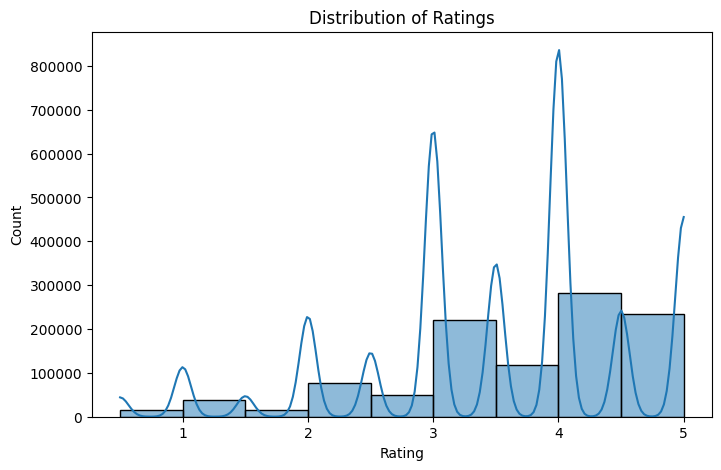

In [11]:
# Distribution of Ratings
plt.figure(figsize=(8, 5))
sns.histplot(data['rating'], bins=9, kde=True)
plt.title("Distribution of Ratings")
plt.xlabel("Rating")
plt.ylabel("Count")
plt.show()

In [12]:
# Genre Analysis
# Split genres by '|'
genre_data = movies.copy()
genre_data['genres'] = genre_data['genres'].str.split('|')
genres_exploded = genre_data.explode('genres')

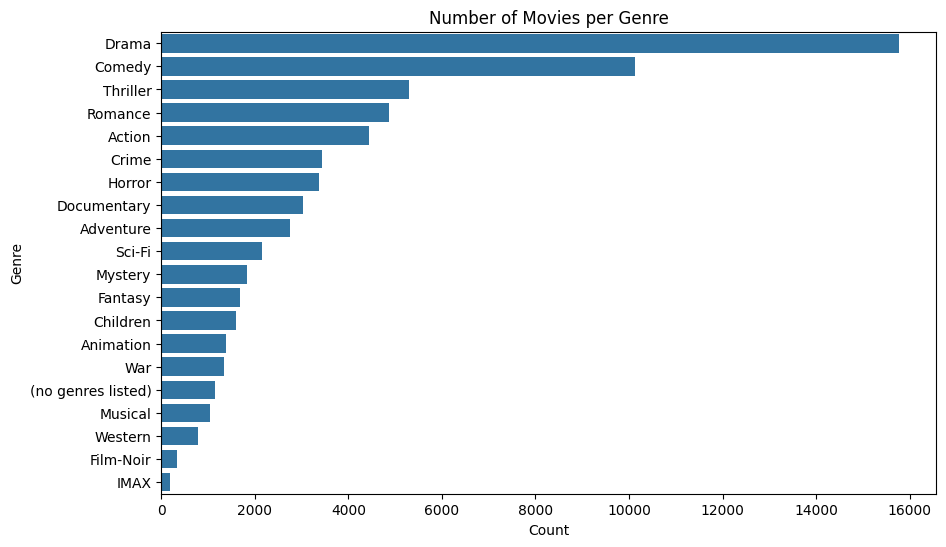

In [13]:
# Genre Frequency
plt.figure(figsize=(10, 6))
sns.countplot(data=genres_exploded, y='genres', order=genres_exploded['genres'].value_counts().index)
plt.title("Number of Movies per Genre")
plt.xlabel("Count")
plt.ylabel("Genre")
plt.show()

In [14]:
def popularity_based_recommender(movies, ratings, genre_input, top_n):
    movies_exploded = movies.copy()
    movies_exploded['genres'] = movies_exploded['genres'].fillna('').astype(str).str.split('|')
    movies_exploded = movies_exploded.explode('genres')
    genre_input = genre_input.lower()
    movies_exploded['genres'] = movies_exploded['genres'].str.lower()

    genre_movies = movies_exploded[movies_exploded['genres'] == genre_input]
    
    if genre_movies.empty:
        return pd.DataFrame(columns=['title', 'avg_rating', 'num_reviews'])
    
    merged = pd.merge(ratings, genre_movies, on='movieId')

    grouped = merged.groupby('title').agg(
        avg_rating=('rating', 'mean'),
        num_reviews=('rating', 'count')
    ).reset_index()

    result = grouped.sort_values(by=['avg_rating', 'num_reviews'], ascending=False).head(top_n)

    return result.reset_index(drop=True)

In [15]:
# 📥 INPUT
genre = input("Enter Genre (e.g., Comedy): ")
top_n = int(input("Enter Number of Recommendations: "))

# 📤 OUTPUT
recommended = popularity_based_recommender(movies, ratings, genre, top_n)

print("\nPopularity-Based Recommendations:")
for i in range(len(recommended)):
    print(f"{i+1}. {recommended['title'][i]}")


Popularity-Based Recommendations:
1. Airbag (1997)
2. Air Force (1943)
3. Can't Change the Meeting Place (1979)
4. Class of 1999 (1990)


In [16]:
# Create a pivot table: users as rows, movies as columns, ratings as values
pivot_table = data.pivot_table(index='userId', columns='title', values='rating')

pivot_table.fillna(0, inplace=True)

# Display part of the pivot table
print("\n🎯 Pivot Table (User-Movie Ratings) — Nulls Replaced with 0:")
print(pivot_table.head())


🎯 Pivot Table (User-Movie Ratings) — Nulls Replaced with 0:
title   "Great Performances" Cats (1998)  $5 a Day (2008)  \
userId                                                      
1                                    0.0              0.0   
2                                    0.0              0.0   
3                                    0.0              0.0   
4                                    0.0              0.0   
5                                    0.0              0.0   

title   $ellebrity (Sellebrity) (2012)  '71 (2014)  \
userId                                               
1                                  0.0         0.0   
2                                  0.0         0.0   
3                                  0.0         0.0   
4                                  0.0         0.0   
5                                  0.0         0.0   

title   'Hellboy': The Seeds of Creation (2004)  \
userId                                            
1                             

In [17]:
# Step 1: Create user-movie matrix
user_movie_matrix = ratings.pivot_table(index='userId', columns='movieId', values='rating')
item_movie_matrix = user_movie_matrix.T  # Transpose: now movies are rows

# Step 2: Fill NaN with 0 for similarity computation
item_filled = item_movie_matrix.fillna(0)

# Step 3: Compute cosine similarity between movies
item_similarity = cosine_similarity(item_filled)
item_similarity_df = pd.DataFrame(item_similarity, index=item_filled.index, columns=item_filled.index)

# Step 4: Item-based collaborative recommender
def item_based_recommender(movie_id, top_n=5):
    if movie_id not in item_similarity_df.index:
        return f"❌ Movie ID {movie_id} not found."

    similar_scores = item_similarity_df[movie_id].sort_values(ascending=False).drop(movie_id)
    top_similar_ids = similar_scores.head(top_n).index

    return movies[movies['movieId'].isin(top_similar_ids)][['title']].reset_index(drop=True)

In [18]:
# 📥 INPUT
movie_title = input("Enter a Movie Title (e.g., Toy Story): ")
top_n = int(input("Enter Number of Similar Movies to Recommend: "))

# Find movie ID from title
movie_row = movies[movies['title'].str.lower() == movie_title.lower()]

# 📤 OUTPUT
print("\n🎯 Item-Based Collaborative Recommendations:")
if movie_row.empty:
    print("❌ Movie title not found.")
else:
    movie_id = movie_row.iloc[0]['movieId']
    recommendations = item_based_recommender(movie_id, top_n=top_n)
    print(recommendations)


🎯 Item-Based Collaborative Recommendations:
❌ Movie title not found.


In [19]:
import pickle

with open('movies.pkl', 'wb') as f:
    pickle.dump(movies, f)

# Web Application for Movie Recommendation System

This cell provides a step-by-step guide and code to build a web page for your movie recommendation system using Flask (Python backend), HTML, and custom CSS.  
**Features:**  
- Genre-based and item-based recommendations  
- Custom CSS for a modern look  
- Simple, user-friendly interface

**Steps:**  
1. Save your trained functions and data loading logic into a Python file (e.g., `recommender.py`).  
2. Create a Flask app (`app.py`) to serve recommendations via web forms.  
3. Add HTML templates and custom CSS for the frontend.  
4. Run the Flask app and access the web page in your browser.

In [20]:
# 1. Save your recommender logic in recommender.py
# (Copy your popularity_based_recommender and item_based_recommender functions, and data loading code)

# 2. Create app.py (Flask web server)
from flask import Flask, render_template, request
import pandas as pd
from recommender import popularity_based_recommender, item_based_recommender, movies, ratings

app = Flask(__name__)

@app.route('/', methods=['GET', 'POST'])
def index():
    genre_result = None
    item_result = None
    if request.method == 'POST':
        if 'genre' in request.form:
            genre = request.form['genre']
            top_n = int(request.form.get('top_n', 5))
            genre_result = popularity_based_recommender(movies, ratings, genre, top_n)
        if 'movie_title' in request.form:
            movie_title = request.form['movie_title']
            top_n = int(request.form.get('top_n_item', 5))
            movie_row = movies[movies['title'].str.lower() == movie_title.lower()]
            if not movie_row.empty:
                movie_id = movie_row.iloc[0]['movieId']
                item_result = item_based_recommender(movie_id, top_n=top_n)
            else:
                item_result = pd.DataFrame({'title': ['Movie not found.']})
    return render_template('index.html', genre_result=genre_result, item_result=item_result)

if __name__ == '__main__':
    app.run(debug=True)

🎬 Movies Dataset:


NameError: name 'movies' is not defined

## 3. Create `templates/index.html` for the frontend

```html
<!DOCTYPE html>
<html lang="en">
<head>
    <meta charset="UTF-8">
    <title>Movie Recommendation System</title>
    <link rel="stylesheet" href="{{ url_for('static', filename='style.css') }}">
</head>
<body>
    <div class="container">
        <h1>🎬 Movie Recommendation System</h1>
        <form method="post">
            <div class="form-section">
                <h2>Genre-based Recommendations</h2>
                <input type="text" name="genre" placeholder="Enter Genre (e.g., Comedy)" required>
                <input type="number" name="top_n" min="1" max="20" value="5">
                <button type="submit">Recommend by Genre</button>
            </div>
            {% if genre_result is not none %}
                <div class="results">
                    <h3>Top Recommendations:</h3>
                    <ul>
                        {% for idx, row in genre_result.iterrows() %}
                            <li>{{ loop.index }}. {{ row['title'] }}</li>
                        {% endfor %}
                    </ul>
                </div>
            {% endif %}
            <hr>
            <div class="form-section">
                <h2>Item-based Recommendations</h2>
                <input type="text" name="movie_title" placeholder="Enter Movie Title" required>
                <input type="number" name="top_n_item" min="1" max="20" value="5">
                <button type="submit">Recommend Similar Movies</button>
            </div>
            {% if item_result is not none %}
                <div class="results">
                    <h3>Similar Movies:</h3>
                    <ul>
                        {% for idx, row in item_result.iterrows() %}
                            <li>{{ loop.index }}. {{ row['title'] }}</li>
                        {% endfor %}
                    </ul>
                </div>
            {% endif %}
        </form>
    </div>
</body>
</html>
```

## 4. Create `static/style.css` for custom styling

```css
body {
    background: #181c24;
    color: #f5f5f5;
    font-family: 'Segoe UI', Arial, sans-serif;
    margin: 0;
    padding: 0;
}
.container {
    max-width: 600px;
    margin: 40px auto;
    background: #232a34;
    border-radius: 12px;
    box-shadow: 0 4px 24px rgba(0,0,0,0.2);
    padding: 32px 40px;
}
h1, h2, h3 {
    color: #ffb347;
    margin-bottom: 16px;
}
.form-section {
    margin-bottom: 24px;
}
input[type="text"], input[type="number"] {
    padding: 8px 12px;
    border-radius: 6px;
    border: none;
    margin-right: 8px;
    margin-bottom: 8px;
    font-size: 1em;
}
button {
    background: #ffb347;
    color: #232a34;
    border: none;
    border-radius: 6px;
    padding: 8px 18px;
    font-size: 1em;
    cursor: pointer;
    transition: background 0.2s;
}
button:hover {
    background: #ffd580;
}
.results {
    background: #2e3642;
    border-radius: 8px;
    padding: 16px;
    margin-top: 12px;
}
ul {
    padding-left: 20px;
}
li {
    margin-bottom: 6px;
}
hr {
    border: 0;
    border-top: 1px solid #444;
    margin: 24px 0;
}
```

## 5. How to Run

1. Place your `recommender.py`, `app.py`, `templates/index.html`, and `static/style.css` in the same project folder.
2. Install Flask:  
   `pip install flask`
3. Run the app:  
   `python app.py`
4. Open [http://127.0.0.1:5000](http://127.0.0.1:5000) in your browser.

You now have a web page for your recommendation system with custom CSS and interactive forms!